In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
log_folder='logs'

algoritimos = {
    1: "Concurrent",
    2: "FCFS-E",
    3: "DP-E",    
    4: "FCFS-I",
    5: "DP-I",
    7: "CB-E",
    8: "Nova"
}

expertiments_anlysis=[1,2,3,4,5,7]
expertiments_anlysis=[1,5,7]
topology="A"
mobile_users = "14"

## Processos por dispostivo

In [3]:
df_processos_dispositivo = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_users}_processoXDispostivo.csv')
    df['algoritimo'] = algoritimos[experiment_number]
    if df_processos_dispositivo.empty:
        df_processos_dispositivo = df
    else:
        df_processos_dispositivo = pd.concat([df_processos_dispositivo,df])
        
        

df_processos_dispositivo

,Module,Count,Time,Level,Application,Dispostivo,algoritimo
0,connector_0,14,1.0,0,VRGame0,cloud,Concurrent
1,concentration_calculator_0,3,1.0,0,VRGame0,cloud,Concurrent
2,concentration_calculator_0,11,1.0,2,VRGame0,cloudlet-0-1,Concurrent
3,client_0,1,1.0,3,VRGame0,m-VRGame0-0-0,Concurrent
4,client_0,1,1.0,3,VRGame0,m-VRGame0-0-1,Concurrent
...,...,...,...,...,...,...,...
39935,client_0,1,1999.0,3,VRGame0,m-VRGame0-0-9,CB-E
39936,client_0,1,1999.0,3,VRGame0,m-VRGame0-0-10,CB-E
39937,client_0,1,1999.0,3,VRGame0,m-VRGame0-0-11,CB-E
39938,client_0,1,1999.0,3,VRGame0,m-VRGame0-0-12,CB-E


In [4]:
#Excluindo os dispostivos finais
df_processos_dispositivo = df_processos_dispositivo[~df_processos_dispositivo['Dispostivo'].str.startswith("m")]
#df_processos_dispositivo.head()

In [5]:
dcsn_modules = ["object_tracker","object_detector","motion_detector"]
vr_game_modules = ["client_","concentration_calculator_", "connector_"]

#vr_game_modules = np.unique([ value for value in [process[:process.rfind("_")+1] for process in dados["Processo"].values] if value in vr_game_modules ])
#vr_game_modules

In [6]:
df_processos_dispositivo["app"] =0
df_processos_dispositivo["app"] = np.where(df_processos_dispositivo["Module"].isin(dcsn_modules),"DCNS",df_processos_dispositivo["app"])
df_processos_dispositivo["app"] = np.where(df_processos_dispositivo["Module"].str.startswith(tuple(vr_game_modules)),"VR_GAME",df_processos_dispositivo["app"])
df_processos_dispositivo = df_processos_dispositivo[df_processos_dispositivo['app'] !='0' ]
df_processos_dispositivo[df_processos_dispositivo['app']=='VR_GAME']

<ipython-input-6-1985d39fab38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processos_dispositivo["app"] =0
<ipython-input-6-1985d39fab38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processos_dispositivo["app"] = np.where(df_processos_dispositivo["Module"].isin(dcsn_modules),"DCNS",df_processos_dispositivo["app"])
<ipython-input-6-1985d39fab38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Module,Count,Time,Level,Application,Dispostivo,algoritimo,app
0,connector_0,14,1.0,0,VRGame0,cloud,Concurrent,VR_GAME
1,concentration_calculator_0,3,1.0,0,VRGame0,cloud,Concurrent,VR_GAME
2,concentration_calculator_0,11,1.0,2,VRGame0,cloudlet-0-1,Concurrent,VR_GAME
17,connector_0,14,2.0,0,VRGame0,cloud,Concurrent,VR_GAME
18,concentration_calculator_0,3,2.0,0,VRGame0,cloud,Concurrent,VR_GAME
...,...,...,...,...,...,...,...,...
39881,concentration_calculator_0,14,1997.0,0,VRGame0,cloud,CB-E,VR_GAME
39900,connector_0,14,1998.0,0,VRGame0,cloud,CB-E,VR_GAME
39901,concentration_calculator_0,14,1998.0,0,VRGame0,cloud,CB-E,VR_GAME
39920,connector_0,14,1999.0,0,VRGame0,cloud,CB-E,VR_GAME


In [7]:
np.where(df_processos_dispositivo["Module"].str.startswith(tuple(vr_game_modules)),"VR_GAME",df_processos_dispositivo["app"])

array(['VR_GAME', 'VR_GAME', 'VR_GAME', ..., 'VR_GAME', 'DCNS', 'DCNS'],
      dtype=object)

In [8]:
def plotDispostivoXAppXTimer():
    dispostivoXAppXTimer =  df_processos_dispositivo.groupby(["algoritimo","Dispostivo","Application","Time"])['Count'].agg('sum').reset_index()
    
    dispostivoXAppXTimer["label"] = dispostivoXAppXTimer["Application"] +"/"+dispostivoXAppXTimer["Dispostivo"]
    
    
    dispostivoXAppXTimerToPlot = pd.pivot_table(
        dispostivoXAppXTimer[["algoritimo","label","Count","Time"]], 
        index=["Time"], 
                                                columns=["label"],
                                               values=["algoritimo","Count"],
                                               fill_value=0)

    #Ajusta o título das colunas
    dispostivoXAppXTimerToPlot.columns = [col[1] for col in dispostivoXAppXTimerToPlot.columns.values]

    fig, axes = plt.subplots(nrows=len(expertiments_anlysis), ncols=1, figsize=(15, 5*len(expertiments_anlysis)))

    for idx,algorithm in enumerate(expertiments_anlysis):
        df = dispostivoXAppXTimer[dispostivoXAppXTimer['algoritimo']==algoritimos[algorithm]]   
        df_to_plot = pd.pivot_table(
            df[["label","Count","Time"]], 
            index=["Time"],
            columns=["label"],
            values=["Count"],
            fill_value=0
        )
        df_to_plot.columns = [col[1] for col in df_to_plot.columns.values]
        df_to_plot.plot(ax=axes[idx], title=algoritimos[algorithm])

In [9]:
# #plotDispostivoXAppXTimer()
# teste = df_processos_dispositivo
# teste = df_processos_dispositivo[['algoritimo','Count','app','Time']]
# teste = teste.groupby(['algoritimo','app','Time']).agg('sum','Count').reset_index()
# teste
# teste[teste['algoritimo']=='Concurrent'].pivot(index=['Time'], columns=['app'],values=['Count']).plot(
#     style=['.','v'],
#     markevery=100)


# #.groupby('Time').agg('sum','Count').plot()

teste = df_processos_dispositivo
teste = teste[teste['app']=="DCNS"]
teste = teste[teste['algoritimo']=="CB-E"]
teste[teste['Time']==500]

,Module,Count,Time,Level,Application,Dispostivo,algoritimo,app
9943,object_tracker,1,500.0,2,DCNS,cloudlet-0-1,CB-E,DCNS
9944,object_detector,1,500.0,2,DCNS,cloudlet-0-1,CB-E,DCNS


Applicatoin Modules Count By Device


<ipython-input-10-1273e0280705>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


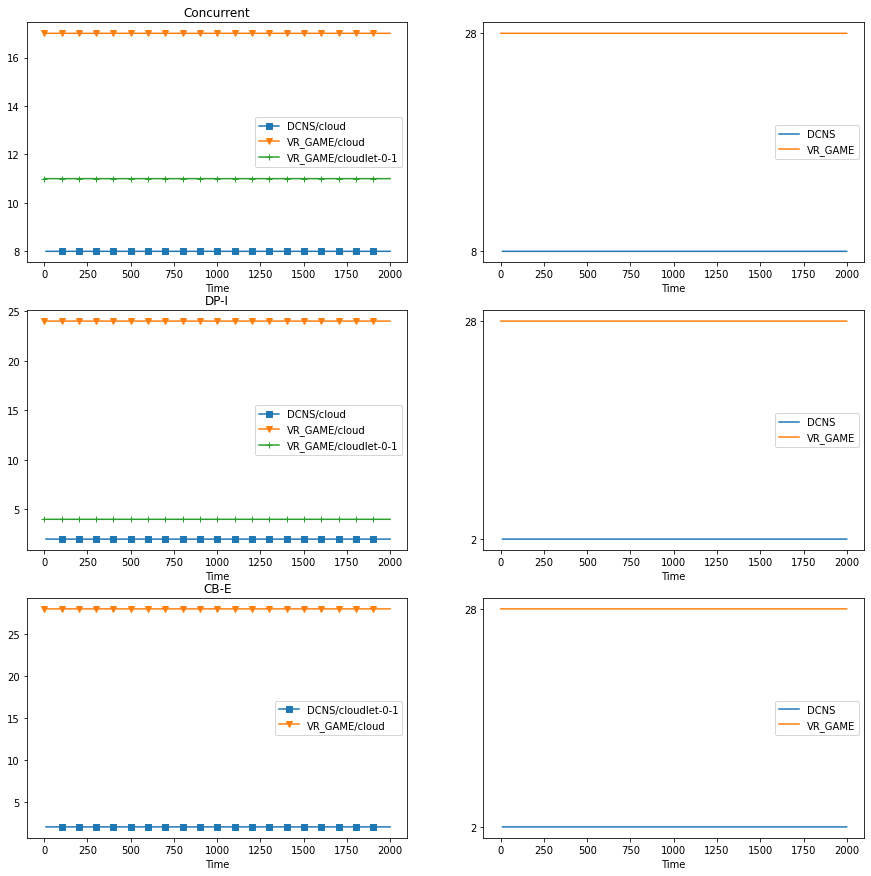

In [10]:
def plotDispostivoXGroupedAppXTimer():
    dispostivoXAppXTimer =  df_processos_dispositivo.groupby(["algoritimo","Dispostivo","app","Time"])['Count'].agg('sum').reset_index()
    #Adiciona o label das categorias
    dispostivoXAppXTimer["label"] = dispostivoXAppXTimer["app"] +"/"+dispostivoXAppXTimer["Dispostivo"]
    #Adiciona o label como colunas da tabela
  
    fig, axes = plt.subplots(nrows=len(expertiments_anlysis), ncols=2, figsize=(15, 5*len(expertiments_anlysis)))
    #fig.suptitle("Applicatoin Modules Count By Device",y=0.98)

    for idx,algorithm in enumerate(expertiments_anlysis):
        df = dispostivoXAppXTimer[dispostivoXAppXTimer['algoritimo']==algoritimos[algorithm]]   
        df_to_plot = pd.pivot_table(
            df[["label","Count","Time"]], 
            index=["Time"],
            columns=["label"],
            values=["Count"]
        )
        df_to_plot.columns = [col[1] for col in df_to_plot.columns.values]
        df_to_plot.plot(ax=axes[idx,0], title=algoritimos[algorithm],
                        style=['-s','-v','-+','-*','-D'],
                        markevery=100)
        
        
    for idx,algorithm in enumerate(expertiments_anlysis):
        df = dispostivoXAppXTimer[dispostivoXAppXTimer['algoritimo']==algoritimos[algorithm]]   
        df = df[['Count','app','Time']]
        df = df.groupby(['app','Time']).agg('sum','Count').reset_index()
        df_to_plot = df.pivot(index=['Time'], columns=['app'],values=['Count'])
        df_to_plot.columns = [col[1] for col in df_to_plot.columns.values]
        df_to_plot.plot(ax=axes[idx,1], yticks=df['Count'].unique())


    #fig.suptitle("Applicatoin Modules Count By Device")    
    print("Applicatoin Modules Count By Device")
    
    fig.show()
        
plotDispostivoXGroupedAppXTimer();        

# Delay

In [11]:
df_delay = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_users}_loopsDelays.csv')
    df['algoritimo'] = algoritimos[experiment_number]
    if df_delay.empty:
        df_delay = df
    else:
        df_delay = pd.concat([df_delay,df])
        
        
df_delay["app"] =0
df_delay["app"] = np.where(df_delay["Application"].str.startswith("VRGame"),"VR_GAME",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("DCNS"),"DCNS",df_delay["app"])
#dados = dados[dados['app'] !='0' ]
#df_delay
        
#df_delay

In [12]:
df_delay

,Time,Delay,Application,LoopString,Loop,algoritimo,app
0,1.0,0.000000,VRGame0,EEG_0 | client_0 | concentration_calculator_0 ...,3,Concurrent,VR_GAME
1,1.0,0.000000,DCNS,motion_detector | object_detector | object_tra...,1,Concurrent,DCNS
2,1.0,0.000000,DCNS,object_tracker | PTZ_CONTROL,2,Concurrent,DCNS
3,2.0,0.000000,VRGame0,EEG_0 | client_0 | concentration_calculator_0 ...,3,Concurrent,VR_GAME
4,2.0,0.000000,DCNS,motion_detector | object_detector | object_tra...,1,Concurrent,DCNS
...,...,...,...,...,...,...,...
5992,1998.0,11.816472,DCNS,motion_detector | object_detector | object_tra...,1,CB-E,DCNS
5993,1998.0,8.573458,DCNS,object_tracker | PTZ_CONTROL,2,CB-E,DCNS
5994,1999.0,378.461692,VRGame0,EEG_0 | client_0 | concentration_calculator_0 ...,3,CB-E,VR_GAME
5995,1999.0,11.816472,DCNS,motion_detector | object_detector | object_tra...,1,CB-E,DCNS


In [13]:
df_delay['Application'].unique()
#dados = dados[dados['Application'].isin(["VRGame", "DCNS"])]
df_delay = df_delay[["algoritimo","Time","Application","Delay","app"]]
df_delay

,algoritimo,Time,Application,Delay,app
0,Concurrent,1.0,VRGame0,0.000000,VR_GAME
1,Concurrent,1.0,DCNS,0.000000,DCNS
2,Concurrent,1.0,DCNS,0.000000,DCNS
3,Concurrent,2.0,VRGame0,0.000000,VR_GAME
4,Concurrent,2.0,DCNS,0.000000,DCNS
...,...,...,...,...,...
5992,CB-E,1998.0,DCNS,11.816472,DCNS
5993,CB-E,1998.0,DCNS,8.573458,DCNS
5994,CB-E,1999.0,VRGame0,378.461692,VR_GAME
5995,CB-E,1999.0,DCNS,11.816472,DCNS


In [14]:
print(df_delay[-1:])
#df_delay.groupby(['algoritimo','Application',"Time"]).sum('Delay')

     algoritimo    Time Application     Delay   app
5996       CB-E  1999.0        DCNS  8.573458  DCNS


Applicatoin Delay Average By Device


<ipython-input-15-eb7b7038cd2e>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


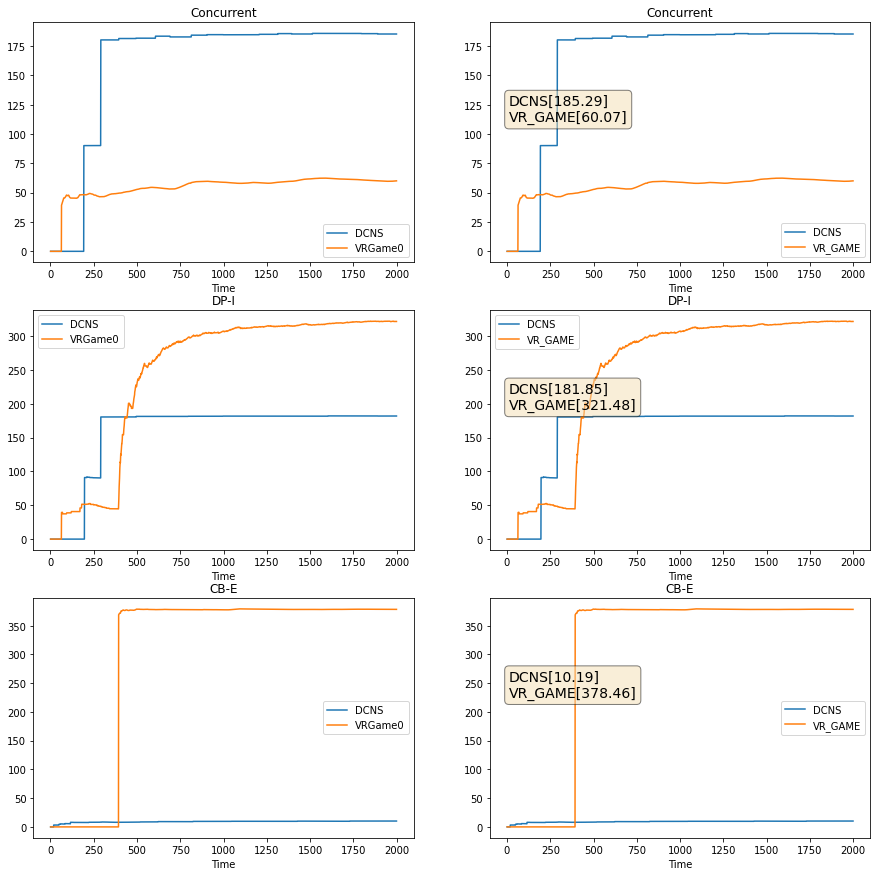

In [15]:
def plotDelayByApplication():
    fig, axes = plt.subplots(nrows=len(expertiments_anlysis), ncols=2, figsize=(15, 5*len(expertiments_anlysis)))
    #fig.suptitle("Applicatoin Modules Count By Device",y=0.98)

    for idx,algorithm in enumerate(expertiments_anlysis):
        df = df_delay[df_delay['algoritimo']==algoritimos[algorithm]]   
        df_to_plot = pd.pivot_table(
            df, 
            index=["Time"],
            columns=["Application"],
            values=["Delay"],
            fill_value=0
        )
        df_to_plot.columns = [col[1] for col in df_to_plot.columns.values]
        df_to_plot.plot(ax=axes[idx,0], title=algoritimos[algorithm])
        
    for idx,algorithm in enumerate(expertiments_anlysis):
        df = df_delay[df_delay['algoritimo']==algoritimos[algorithm]]   
        
        delayAverageGrouped = df.groupby(["app","Time"])['Delay'].agg('mean').reset_index()
        df_to_plot = delayAverageGrouped.pivot(index=["Time"], 
               columns=["app"],
               values=["Delay"])
        df_to_plot.columns = [col[1] for col in df_to_plot.columns.values]
        df_to_plot.plot.line(ax=axes[idx,1], title=algoritimos[algorithm])
        
        textstr = '\n'.join(
            [f'{column}[{df_to_plot.iloc[-1:][column].values[0]:0.2f}]' for column in df_to_plot.columns.values])             
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        axes[idx,1].text(0.05, 0.7, textstr, transform=axes[idx,1].transAxes, fontsize=14, verticalalignment='top', bbox=props)
    
    #fig.suptitle("Applicatoin Modules Count By Device")    
    print("Applicatoin Delay Average By Device")
    fig.show()
        
plotDelayByApplication();        


# CPU

In [16]:
df_cpu = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_users}_cpuUsage.csv')
    df['algoritimo'] = algoritimos[experiment_number]
    if df_cpu.empty:
        df_cpu = df
    else:
        df_cpu = pd.concat([df_cpu,df])
df_cpu['cpu_load'] = df_cpu['CpuUsage']*100/df_cpu['CpuTotal']
df_cpu

,Time,CpuUsage,Device,CpuTotal,algoritimo,cpu_load
0,1.0,2450.0,cloud,44800.0,Concurrent,5.46875
1,1.0,0.0,proxy-server,1.0,Concurrent,0.00000
2,1.0,3850.0,cloudlet-0-1,4000.0,Concurrent,96.25000
3,1.0,0.0,m-DCNS-0-0,1000.0,Concurrent,0.00000
4,1.0,0.0,m-DCNS-0-1,1000.0,Concurrent,0.00000
...,...,...,...,...,...,...
35977,1999.0,200.0,m-VRGame0-0-9,1000.0,CB-E,20.00000
35978,1999.0,200.0,m-VRGame0-0-10,1000.0,CB-E,20.00000
35979,1999.0,200.0,m-VRGame0-0-11,1000.0,CB-E,20.00000
35980,1999.0,200.0,m-VRGame0-0-12,1000.0,CB-E,20.00000


Applicatoin Delay Average By Device


<ipython-input-17-1cd28cc2b39b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


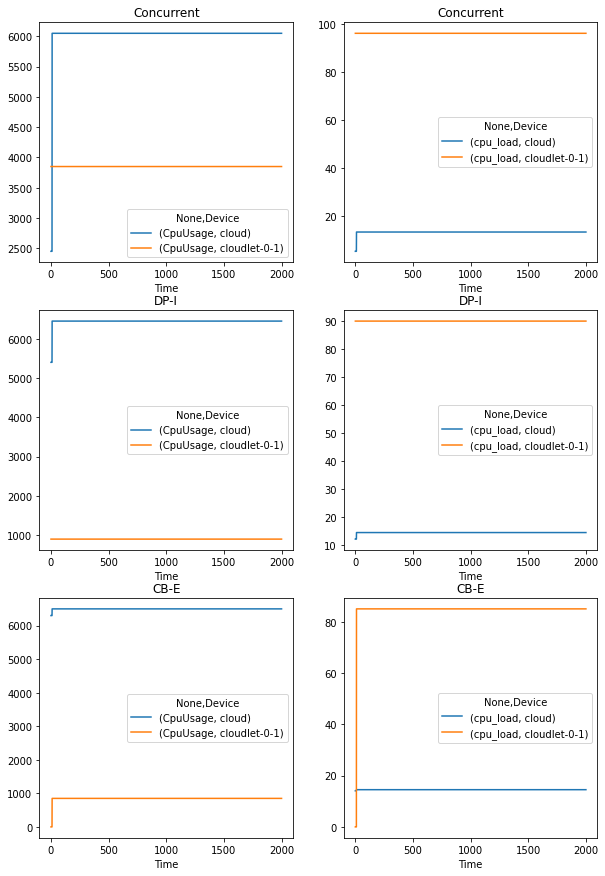

In [17]:
def plotCpuUsage():
    fig, axes = plt.subplots(nrows=len(expertiments_anlysis), ncols=2, figsize=(10, 5*len(expertiments_anlysis)))
    #fig.suptitle("Applicatoin Modules Count By Device",y=0.98)

    for idx,algorithm in enumerate(expertiments_anlysis):
        df = df_cpu[df_cpu['algoritimo']==algoritimos[algorithm]]   
        df[df['Device']
           .str
           .startswith("cloud")].pivot(index=['Time'], columns=['Device'], values=['CpuUsage']).plot.line(ax=axes[idx,0], title=algoritimos[algorithm])        
        df[df['Device']
           .str
           .startswith("cloud")].pivot(index=['Time'], columns=['Device'], values=['cpu_load']).plot.line(ax=axes[idx,1], title=algoritimos[algorithm])        
            
    
    #fig.suptitle("Applicatoin Modules Count By Device")    
    print("Applicatoin Delay Average By Device")
    fig.show()
        
plotCpuUsage()

In [18]:
df_network = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_users}_network.csv')
    df['algoritimo'] = algoritimos[experiment_number]
    if df_network.empty:
        df_network = df
    else:
        df_network = pd.concat([df_network,df])
        
        

df_network

,Time,CurrentNetwork,algoritimo
0,1.0,0.000000,Concurrent
1,1.0,0.000000,Concurrent
2,1.0,0.000000,Concurrent
3,1.0,0.000000,Concurrent
4,1.0,0.000000,Concurrent
...,...,...,...
35977,1999.0,185228.614307,CB-E
35978,1999.0,185228.614307,CB-E
35979,1999.0,185228.614307,CB-E
35980,1999.0,185228.614307,CB-E


Network usage


<ipython-input-19-46f9290b53b6>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


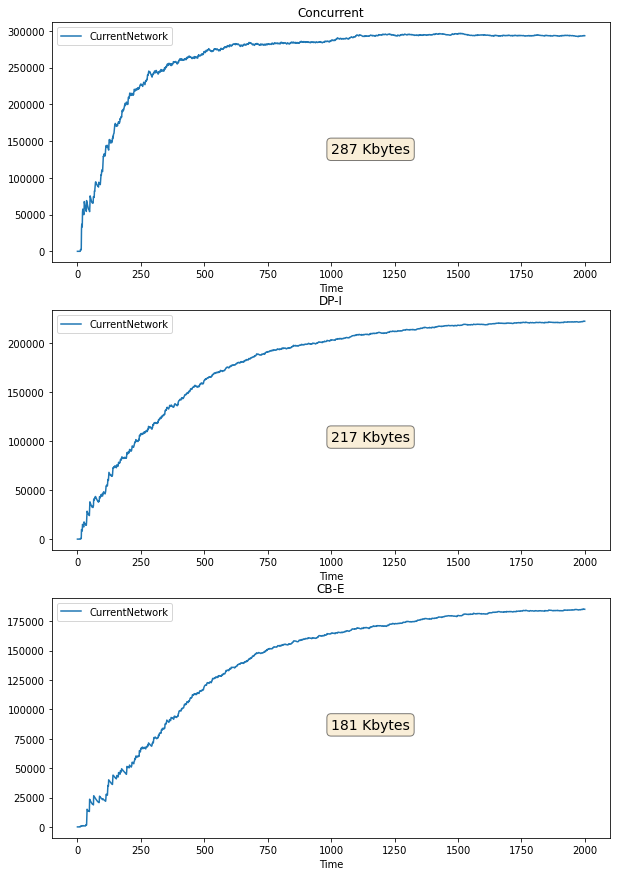

In [19]:
def plotNetwork():
    fig, axes = plt.subplots(nrows=len(expertiments_anlysis), ncols=1, figsize=(10, 5*len(expertiments_anlysis)))
    #fig.suptitle("Applicatoin Modules Count By Device",y=0.98)

    for idx,algorithm in enumerate(expertiments_anlysis):
        df = df_network[df_network['algoritimo']==algoritimos[algorithm]]   
        df.plot.line(x='Time',y='CurrentNetwork', ax=axes[idx], title=algoritimos[algorithm])
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        final = df.iloc[-1:]['CurrentNetwork'].values[0]/1024
        
        axes[idx].text(0.5, 0.5, f'{final:0.0f} Kbytes', transform=axes[idx].transAxes, fontsize=14, 
                       verticalalignment='top',
                       bbox=props)
    
    #fig.suptitle("Applicatoin Modules Count By Device")    
    print("Network usage")
    fig.show()
        
plotNetwork()

In [20]:
df_tuple_delay = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_users}_tupleDelay.csv')
    df['algoritimo'] = algoritimos[experiment_number]
    if df_tuple_delay.empty:
        df_tuple_delay = df
    else:
        df_tuple_delay = pd.concat([df_tuple_delay,df])
        
        
df_tuple_delay["app"] =0
df_tuple_delay["app"] = np.where(df_tuple_delay["Application"].str.startswith("VRGame"),"VR_GAME",df_tuple_delay["app"])
df_tuple_delay["app"] = np.where(df_tuple_delay["Application"].str.startswith("DCNS"),"DCNS",df_tuple_delay["app"])

df_tuple_delay
        
#df_delay

,Time,Delay,Application,TupleId,LoopString,Loop,algoritimo,app
0,63.768985,39.309434,VRGame0,159,EEG_0 | client_0 | concentration_calculator_0 ...,3,Concurrent,VR_GAME
1,64.718985,40.259434,VRGame0,168,EEG_0 | client_0 | concentration_calculator_0 ...,3,Concurrent,VR_GAME
2,65.668985,41.209434,VRGame0,169,EEG_0 | client_0 | concentration_calculator_0 ...,3,Concurrent,VR_GAME
3,66.618985,42.159434,VRGame0,178,EEG_0 | client_0 | concentration_calculator_0 ...,3,Concurrent,VR_GAME
4,67.568985,43.109434,VRGame0,179,EEG_0 | client_0 | concentration_calculator_0 ...,3,Concurrent,VR_GAME
...,...,...,...,...,...,...,...,...
1922,1997.390992,380.729788,VRGame0,8477,EEG_0 | client_0 | concentration_calculator_0 ...,3,CB-E,VR_GAME
1923,1997.740992,381.079788,VRGame0,8478,EEG_0 | client_0 | concentration_calculator_0 ...,3,CB-E,VR_GAME
1924,1998.526992,381.865788,VRGame0,8488,EEG_0 | client_0 | concentration_calculator_0 ...,3,CB-E,VR_GAME
1925,1999.076992,369.913326,VRGame0,8489,EEG_0 | client_0 | concentration_calculator_0 ...,3,CB-E,VR_GAME


In [21]:
def plotDelayTupleByApplication():
    fig, axes = plt.subplots(nrows=len(expertiments_anlysis), ncols=len(df_tuple_delay['app'].unique()), figsize=(15, 5*len(expertiments_anlysis)))

    for idx,algorithm in enumerate(expertiments_anlysis):
        df = df_tuple_delay[df_tuple_delay['algoritimo']==algoritimos[algorithm]]   
        
        df_to_plot = pd.pivot_table(
            df, 
            index=["Time"],
            columns=["app"],
            values=["Delay"]
        )
        df_to_plot.columns = [col[1] for col in df_to_plot.columns.values]
        
        for id_column, column in enumerate(df_to_plot.columns):
            axes[idx,id_column].scatter(x=df_to_plot.index,y=df_to_plot[column], label="Tuple Delay")
            
            axes[idx,id_column].set_title(algoritimos[algorithm]+" | "+column)
            mean_line = axes[idx,id_column].plot(
                df_to_plot.index,
                [df_to_plot[column].mean()]*len(df_to_plot[column]), 
                label='Mean', linestyle='--',
                color='red')            
            
            axes[idx,id_column].legend(loc='upper right')
            

    fig.show()
        
#plotDelayTupleByApplication();   

<ipython-input-22-ccd02d19c364>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


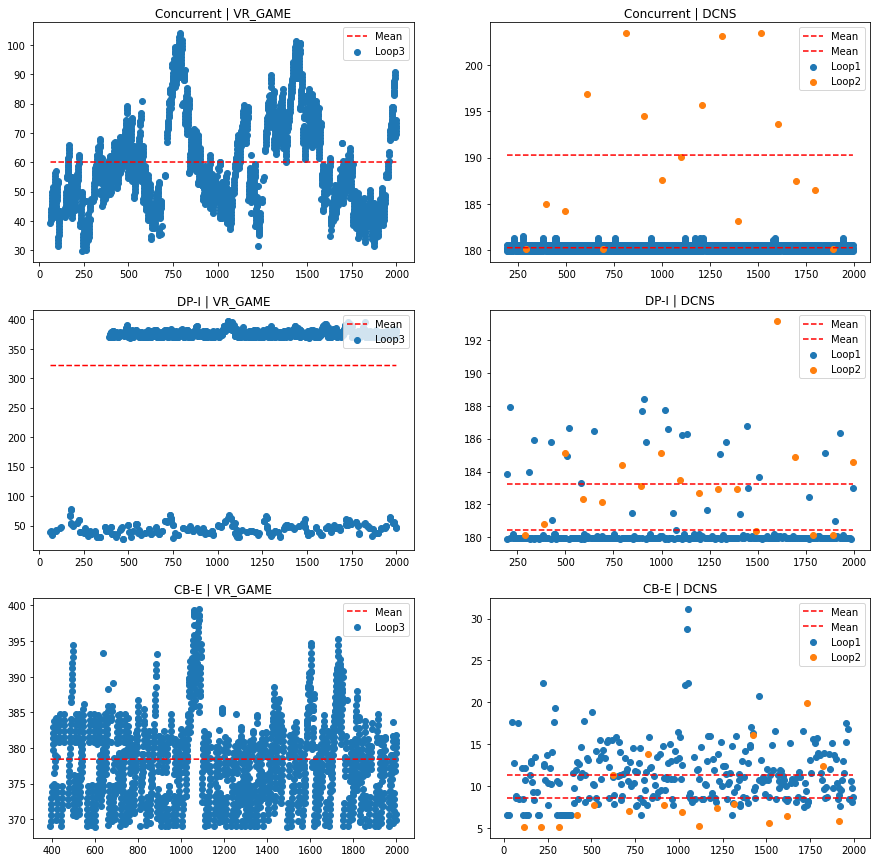

In [22]:
def plotDelayTupleByApplication():
    fig, axes = plt.subplots(nrows=len(expertiments_anlysis), ncols=len(df_tuple_delay['app'].unique()), figsize=(15, 5*len(expertiments_anlysis)))

    for idx,algorithm in enumerate(expertiments_anlysis):
        for idApp, app in enumerate(df_tuple_delay['app'].unique()):
            df = df_tuple_delay[df_tuple_delay['algoritimo']==algoritimos[algorithm]]   
            df = df[df['app']==app]

            df_to_plot = pd.pivot_table(
                df, 
                index=["Time"],
                columns=["Loop"],
                values=["Delay"]
            )
            df_to_plot.columns = [f'Loop{col[1]}' for col in df_to_plot.columns.values]    

            for id_column, column in enumerate(df_to_plot.columns):
                axes[idx,idApp].scatter(x=df_to_plot.index,y=df_to_plot[column], label=column)

                axes[idx,idApp].set_title(algoritimos[algorithm]+" | "+app)
                mean_line = axes[idx,idApp].plot(
                    df_to_plot.index,
                    [df_to_plot[column].mean()]*len(df_to_plot[column]), 
                    label='Mean', linestyle='--',
                    color='red')            

                axes[idx,idApp].legend(loc='upper right')
            

    fig.show()
        
plotDelayTupleByApplication();   

In [23]:
df_execution = pd.DataFrame()

for experiment_number in [7]:
    df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_0_tupleExecution.csv')
    df['algoritimo'] = algoritimos[experiment_number]
    if df_execution.empty:
        df_execution = df
    else:
        df_execution = pd.concat([df_execution,df])
        
        
#df_delay["app"] =0
#df_delay["app"] = np.where(df_delay["Application"].str.startswith("VRGame"),"VR_GAME",df_delay["app"])
#df_delay["app"] = np.where(df_delay["Application"].str.startswith("DCNS"),"DCNS",df_delay["app"])
df_execution['exeuctionTime'] = df_execution['EndTime']-df_execution['StartTime']
df_execution.head(50)

print(df_execution.groupby(['Type'])['exeuctionTime'].apply(lambda x: x.mode()))
df_execution[df_execution['DeviceLevel']==2].head(50)

#df_execution.groupby(['Type']).count()


Type                  
CAMERA               0    1.1
MOTION_VIDEO_STREAM  0    2.1
OBJECT_LOCATION      0    1.1
Name: exeuctionTime, dtype: float64


,Module,Type,EndTime,StartTime,DeviceLevel,DeviceName,algoritimo,exeuctionTime
2,object_detector,MOTION_VIDEO_STREAM,18.554093,16.454093,2,cloudlet-0-1,CB-E,2.100000
3,object_tracker,OBJECT_LOCATION,19.754093,18.654093,2,cloudlet-0-1,CB-E,1.100000
4,object_detector,MOTION_VIDEO_STREAM,22.623565,20.523565,2,cloudlet-0-1,CB-E,2.100000
6,object_tracker,OBJECT_LOCATION,23.823565,22.723565,2,cloudlet-0-1,CB-E,1.100000
7,object_detector,MOTION_VIDEO_STREAM,29.053678,26.953678,2,cloudlet-0-1,CB-E,2.100000
8,object_tracker,OBJECT_LOCATION,30.253678,29.153678,2,cloudlet-0-1,CB-E,1.100000
10,object_detector,MOTION_VIDEO_STREAM,38.324090,36.224090,2,cloudlet-0-1,CB-E,2.100000
11,object_tracker,OBJECT_LOCATION,39.524090,38.424090,2,cloudlet-0-1,CB-E,1.100000
14,object_detector,MOTION_VIDEO_STREAM,53.770224,49.470224,2,cloudlet-0-1,CB-E,4.300000
15,object_detector,MOTION_VIDEO_STREAM,53.770224,49.670224,2,cloudlet-0-1,CB-E,4.100000


In [24]:
mean = df_execution[df_execution['Type']=="MOTION_VIDEO_STREAM"]['exeuctionTime'].mean()
std = df_execution[df_execution['Type']=="MOTION_VIDEO_STREAM"]['exeuctionTime'].std()
print(f'mean:{mean} , std: {std} mean+-std={mean+std},{mean-std}')

mean:5.149422517602537 , std: 3.2354609573737836 mean+-std=8.38488347497632,1.9139615602287536


In [25]:
df_execution.groupby(['algoritimo','DeviceLevel','Module']).agg('count')

Type  EndTime  StartTime  DeviceName  \
algoritimo DeviceLevel Module                                                  
CB-E       2           object_detector   338      338        338         338   
                       object_tracker    338      338        338         338   
           3           motion_detector   339      339        339         339   

                                        exeuctionTime  
algoritimo DeviceLevel Module                          
CB-E       2           object_detector            338  
                       object_tracker             338  
           3           motion_detector            339

In [26]:
df_processos_dispositivo = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_users}_processoXDispostivo.csv')
    df['algoritimo'] = algoritimos[experiment_number]
    if df_processos_dispositivo.empty:
        df_processos_dispositivo = df
    else:
        df_processos_dispositivo = pd.concat([df_processos_dispositivo,df])
        
        
df_processos_dispositivo
df_processos_dispositivo[df_processos_dispositivo['Time']==1999.0].groupby(['algoritimo','Level','Module'])['Count'].sum()

algoritimo  Level  Module                    
CB-E        0      concentration_calculator_0    14
                   connector_0                   14
                   user_interface                 1
            2      object_detector                1
                   object_tracker                 1
            3      client_0                      14
                   motion_detector                1
Concurrent  0      concentration_calculator_0     3
                   connector_0                   14
                   object_detector                4
                   object_tracker                 4
                   user_interface                 1
            2      concentration_calculator_0    11
            3      client_0                      14
                   motion_detector                4
DP-I        0      concentration_calculator_0    12
                   connector_0                   12
                   object_detector                1
                  